# IMPORTING ALL NECCESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA SETS

In [2]:
df_train = pd.read_csv('Train .csv')
df_test = pd.read_csv('Test .csv')

In [3]:
#country,age_group,travel_with,total_tourist,main_activity,package_transport_tz,
#package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,
#total_cost

In [4]:
df_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
df_test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


# OVERVIEW OF THE TRAIN DATASET

In [6]:
df_train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [7]:
df_train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [9]:
df_train.shape

(4809, 23)

In [10]:
df_train.duplicated().sum()

0

In [11]:
# After the observation for the data set TRAIN we discovered:
# 1. the column travel_with has missing values of 1114
# 2. most_impressing has missing values of 313
# 3. total_female and total_male has missing values of 3 and 5 respectively
# 4. the data set is made up of 4809 rows and 23 columns
# 5. No duplicates

# OVERVIEW OF THE TEST DATASET

In [12]:
df_test.shape

(1601, 22)

In [13]:
df_test.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


In [14]:
df_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [16]:
df_test.duplicated().sum()

0

In [17]:
df_test['age_group'].value_counts()

25-44     866
45-64     447
24-Jan    202
65+        86
Name: age_group, dtype: int64

In [18]:
# After the observation for the data set TEST we discovered:
# 1. the column travel_with has missing values of 327
# 2. most_impressing has missing values of 111
# 3. total_female and total_male has missing values of 1 and 2 respectively
# 4. the data set is made up of 1601 rows and 22 columns
# 5. No duplicates
# 6. 24-jan instead of 1-24

# DATA CLEANING FOR BOTH TRAIN AND TEST

In [19]:
# concatenating both tatal_female and total_male to get a new column of their total called 'total_tourist'
df_train['total_tourist'] = df_train['total_male'] + df_train['total_female']
df_test['total_tourist'] = df_test['total_male'] + df_test['total_female']

In [20]:
# concatenating both total_female and total female to get a new column called total night spent
df_train['total_night'] = df_train['night_mainland'] + df_train['night_zanzibar']
df_test['total_night'] = df_test['night_mainland'] + df_test['night_zanzibar']

In [21]:
# filing new column created as total_tourist with the mean for both train and test
df_train['total_tourist'].fillna(value = df_train['total_tourist'].mean(),inplace = True)
df_test['total_tourist'].fillna(value = df_train['total_tourist'].mean(),inplace = True)

In [22]:
#filling both total_ female and total_male with the mean for train data set
df_train['total_female'].fillna(value = df_train['total_female'].mean(),inplace = True)
df_train['total_male'].fillna(value = df_train['total_male'].mean(),inplace = True)

In [23]:
#filling both total_ female and total_male with the mean for test data set
df_test['total_female'].fillna(value = df_test['total_female'].mean(),inplace = True)
df_test['total_male'].fillna(value = df_test['total_male'].mean(),inplace = True)

In [24]:
df_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_tourist,total_night
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0,13.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0,21.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1.0,32.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,2.0,11.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1.0,11.0


In [25]:
# filling most impressing with friendly people
df_train['most_impressing'].fillna(value = 'Friendly People',inplace= True)
df_test['most_impressing'].fillna(value = 'Friendly People',inplace= True)

In [26]:
df_train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_tourist,total_night
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0,13.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0,21.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1.0,32.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,2.0,11.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1.0,11.0


In [27]:
df_train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost                  0
total_tourist               0
total_night                 0
dtype: int64

In [28]:
#note that total_tourists will be NaN if total_male|total_female is NaN 
#fill train NaN travel_with with 'Alone' if total_tourists is 1 for both test and train dataset
df_train.loc[(df_train['total_tourist'] == 1), 'travel_with'] = 'Alone' 
df_test.loc[(df_test['total_tourist'] == 1), 'travel_with'] = 'Alone' 

In [29]:
#filling the values of of 'travel with' with spouse if total_tourist == 2
df_train.loc[(df_train['total_tourist'] ==2), 'travel_with'] = 'spouse' 
df_test.loc[(df_test['total_tourist'] == 2), 'travel_with'] = 'spouse' 

In [30]:
# filling the values of 'travel with' with Nobody if total tourist == 0
df_train.loc[(df_train['total_tourist'] == 0), 'travel_with'] = 'nobody' 
df_test.loc[(df_test['total_tourist'] == 0), 'travel_with'] = 'nobody' 

In [31]:
# filling the values with friends and family if total tourist > 2
df_test.loc[(df_test['total_tourist'] > 2 ), 'travel_with'] = 'Friends/Relatives'
df_train.loc[(df_train['total_tourist'] > 2 ), 'travel_with'] = 'Friends/Relatives'

In [32]:
# age group under the test data set has a problem of 24 - jan repeated in the data set
df_test['age_group'].value_counts()

25-44     866
45-64     447
24-Jan    202
65+        86
Name: age_group, dtype: int64

In [33]:
# comparing with the train data set it should be 1-24 not 24 - jan
df_train['age_group'].value_counts()

25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64

In [34]:
#cleaning the age_group coloumn under test data set
df_test.loc[(df_test['age_group'] == '24-Jan'), 'age_group'] = '1-24'

In [35]:
df_test['age_group'].value_counts()

25-44    866
45-64    447
1-24     202
65+       86
Name: age_group, dtype: int64

In [36]:
df_train.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              1
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_tourist            0
total_night              0
dtype: int64

In [37]:
df_test.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_tourist            0
total_night              0
dtype: int64

In [38]:
#concatinating the two data set for pandas profiling after cleaning up the data
# and assigning new variable name.
# Another method to clean the data set together
df3 =pd.concat([df_train,df_test,])
df3

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_tourist,total_night
0,tour_0,SWIZERLAND,45-64,spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0,13.0
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0,21.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1.0,32.0
3,tour_1002,UNITED KINGDOM,25-44,spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,2.0,11.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,1.0,0.0,Cash,No,Friendly People,NaN,1.0,1.0
1597,tour_990,ITALY,45-64,Friends/Relatives,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,No,No,10.0,5.0,Other,Yes,Wildlife,NaN,4.0,15.0
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,6.0,0.0,Cash,Yes,No comments,NaN,1.0,6.0
1599,tour_996,SOUTH AFRICA,1-24,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,4.0,0.0,Cash,Yes,Wildlife,NaN,1.0,4.0


In [39]:
!pip install sweetviz

In [40]:
import sweetviz as sv

In [41]:
#analysing the data using sweetvis.
report=sv.analyze(df_train)
report.show_html

                                             |                                             | [  0%]   00:00 ->…

<bound method DataframeReport.show_html of <sweetviz.dataframe_report.DataframeReport object at 0x0000027FD6A3F2E0>>


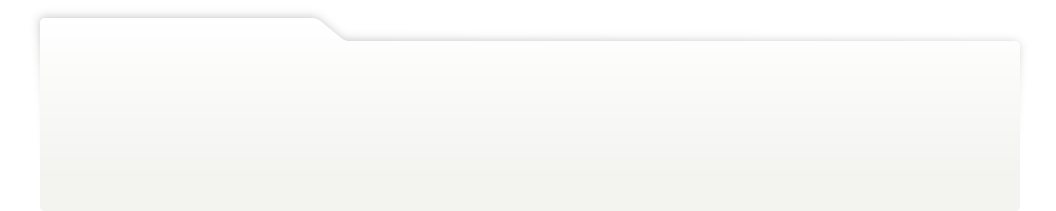
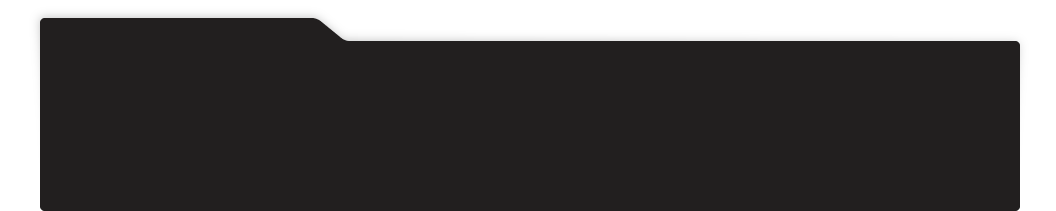
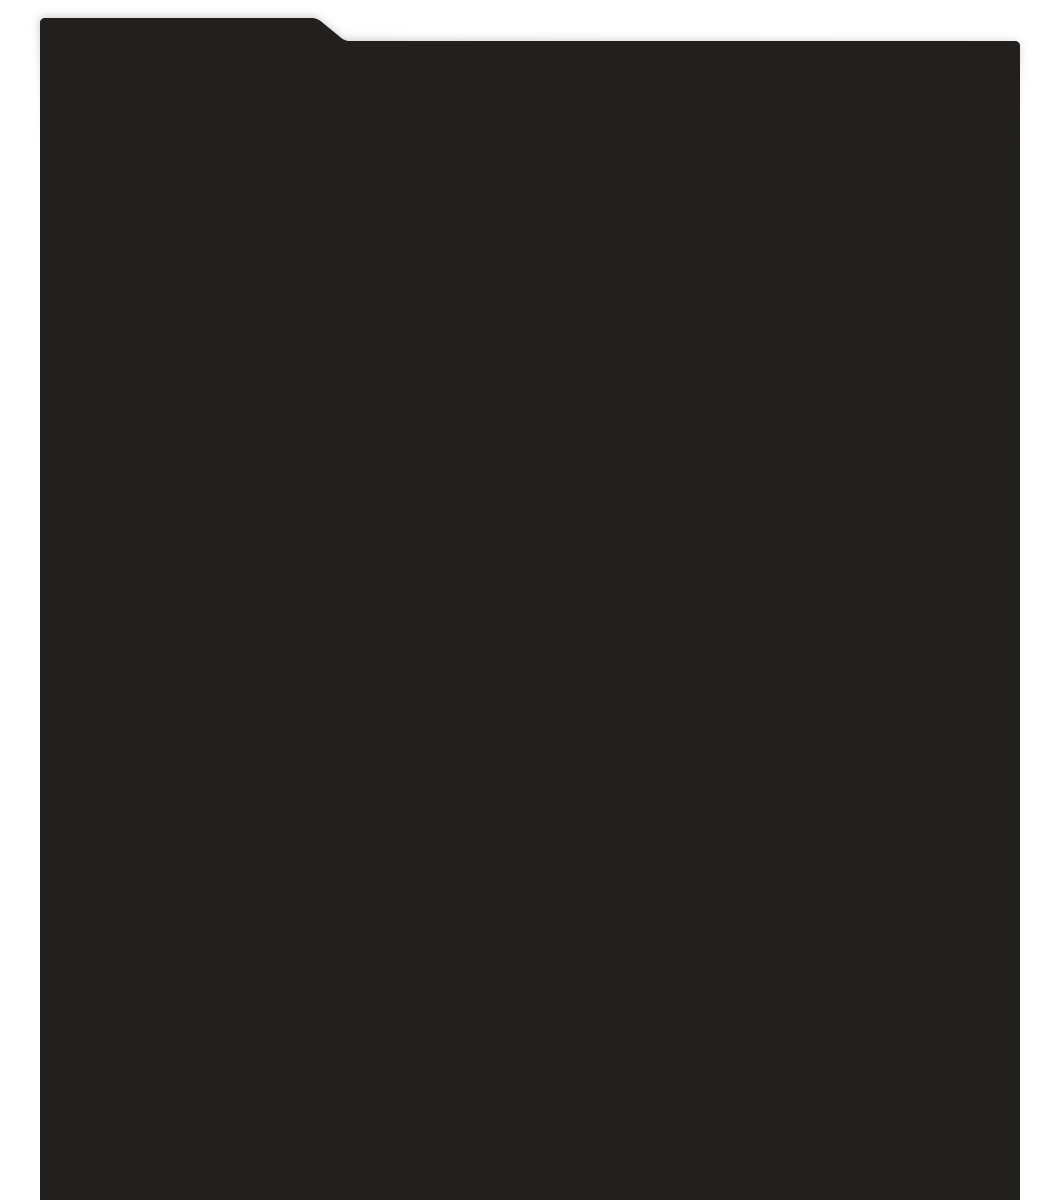
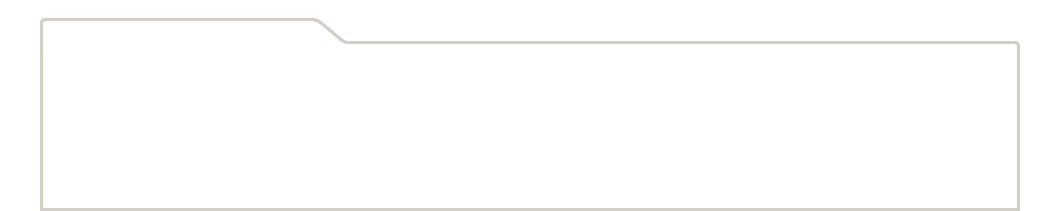
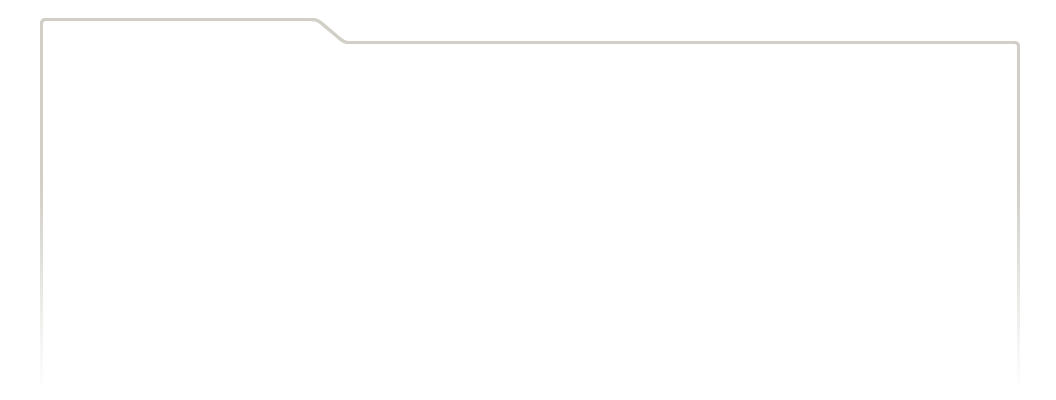
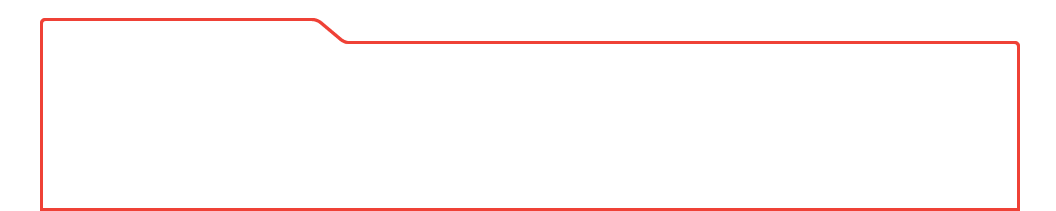
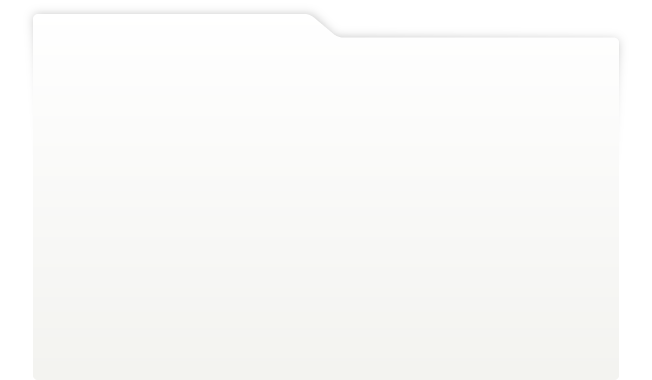
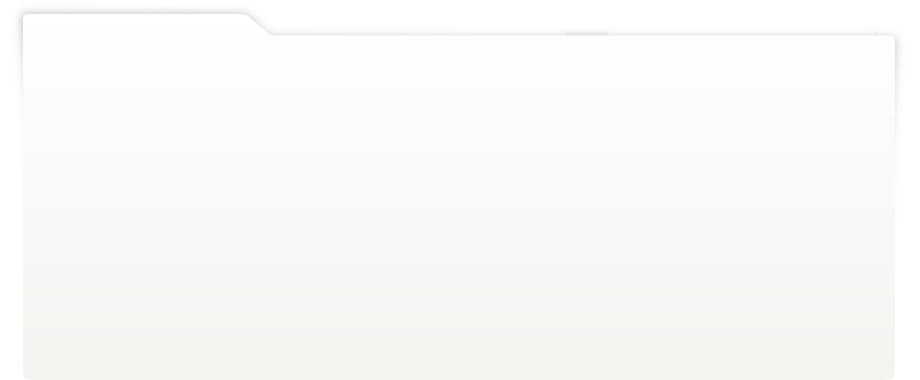
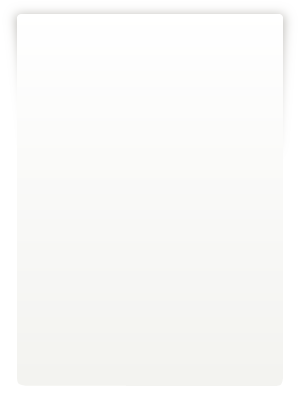
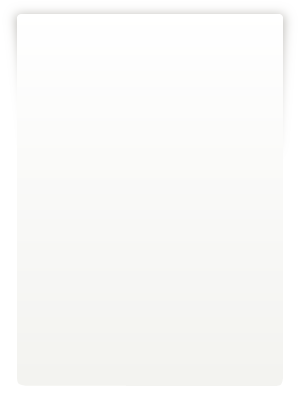
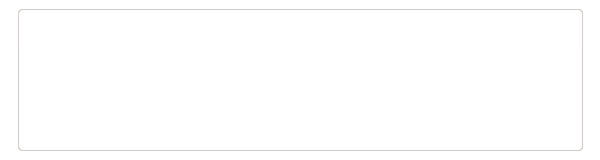
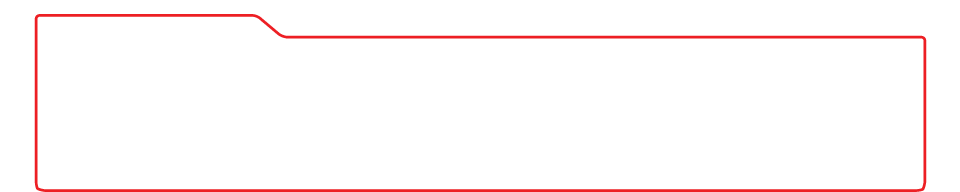
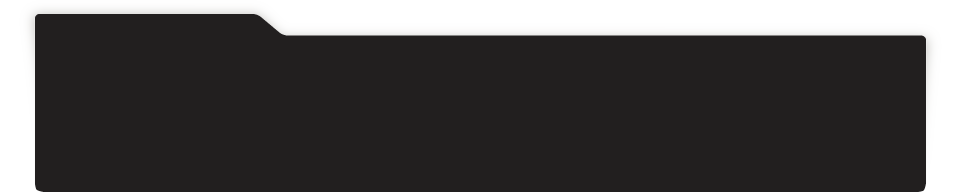
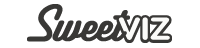
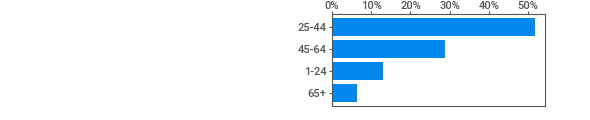
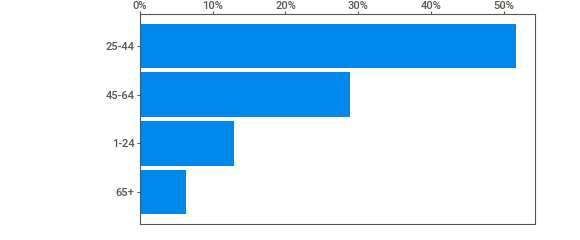
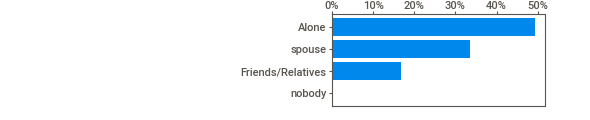
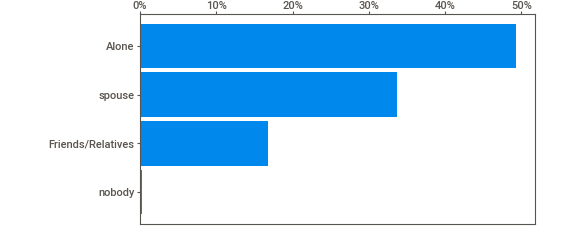
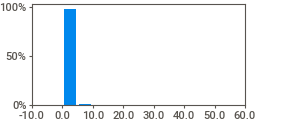
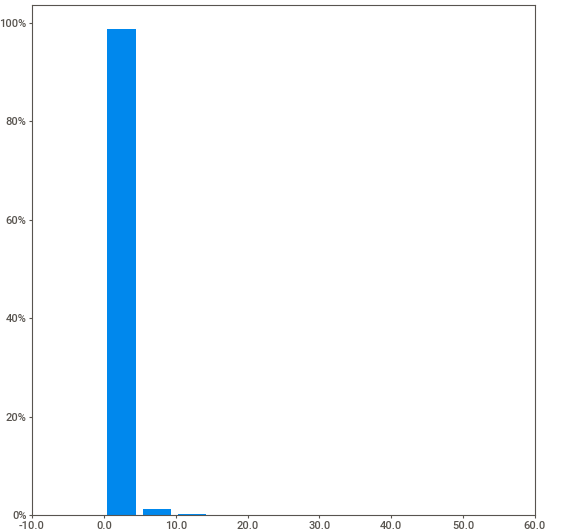
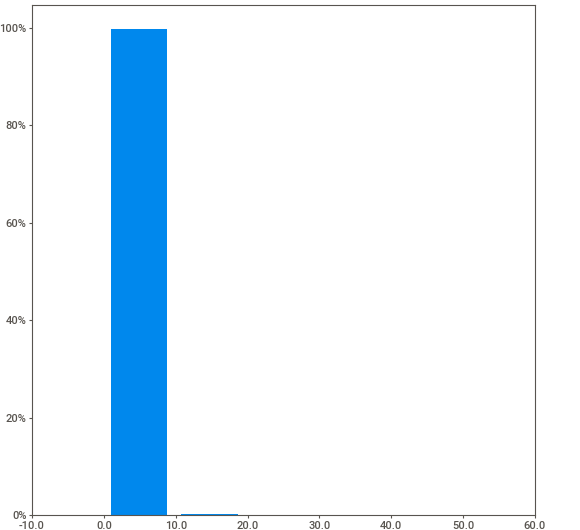
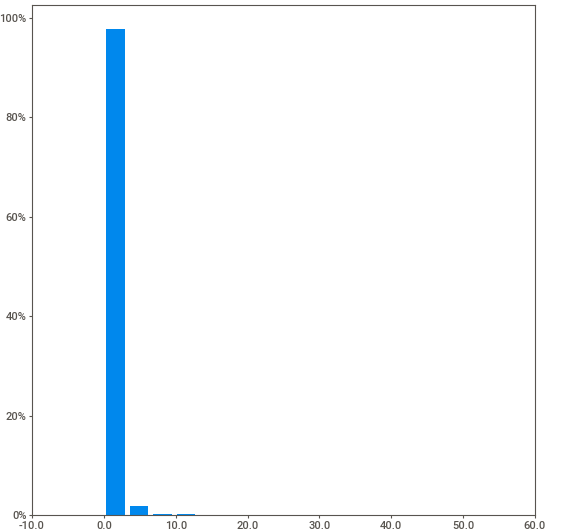
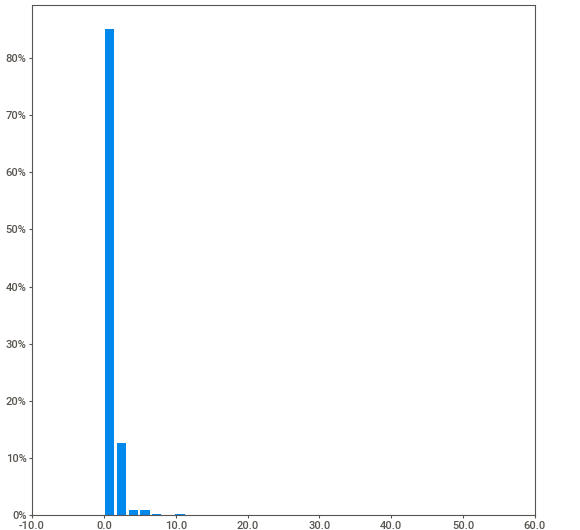
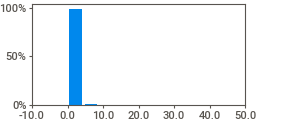
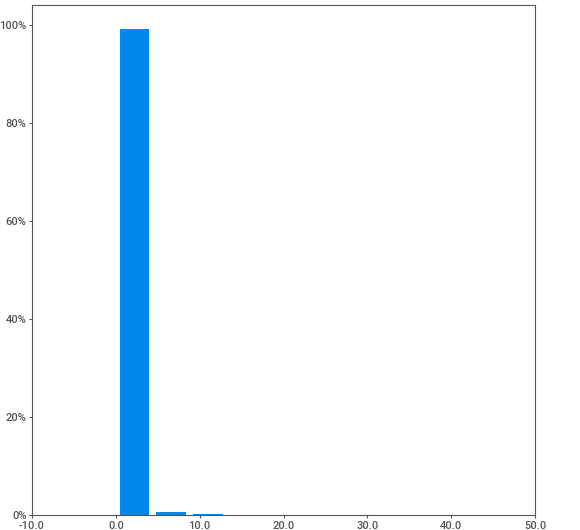
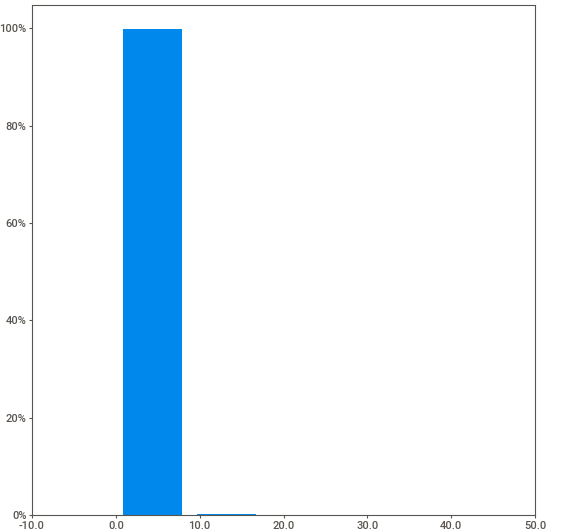
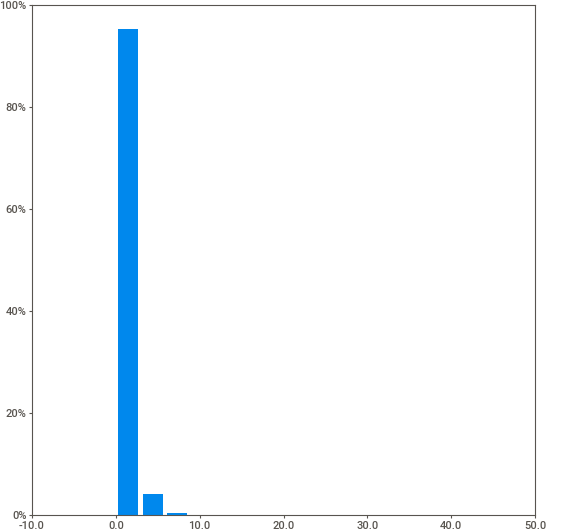
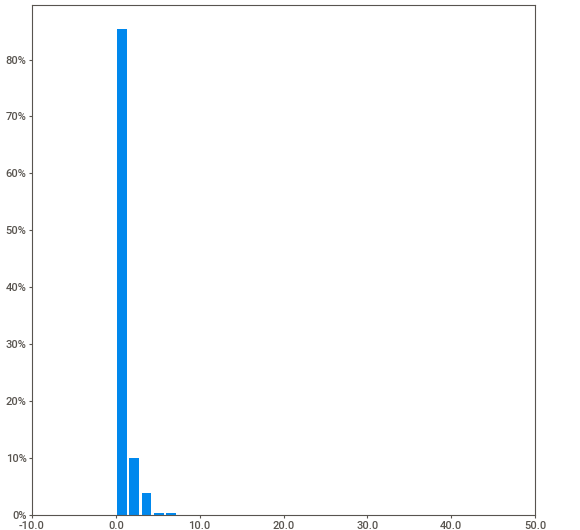
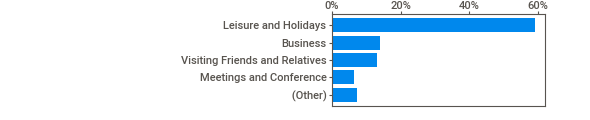
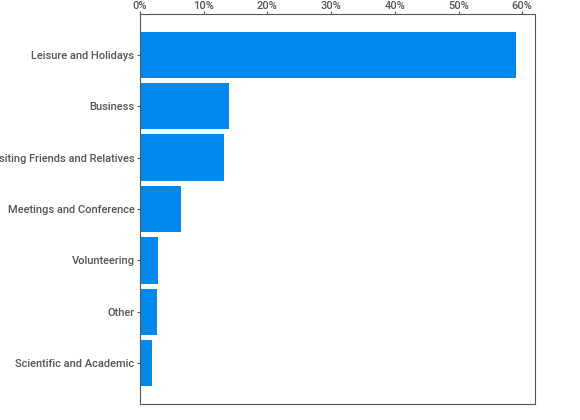
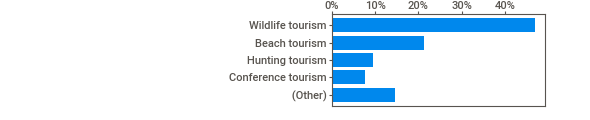
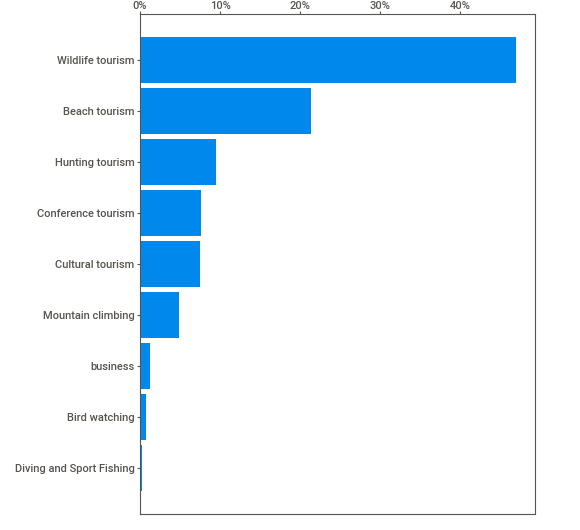
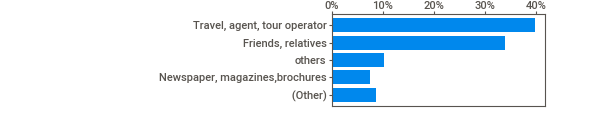
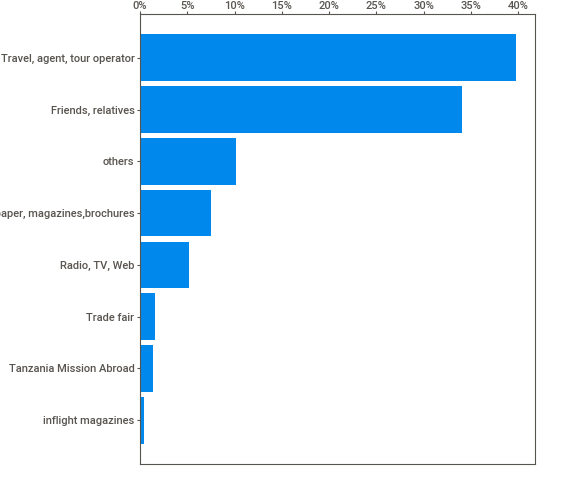
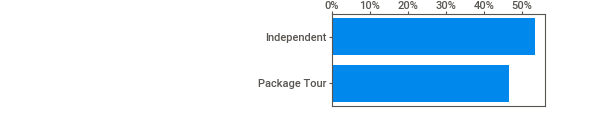
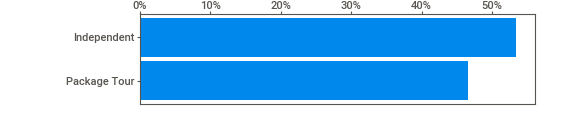
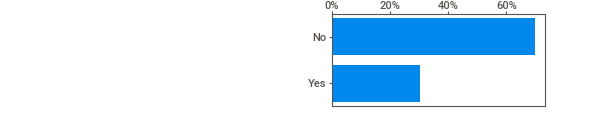
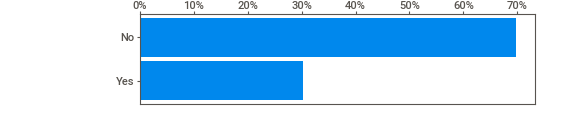
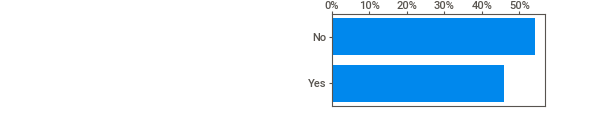
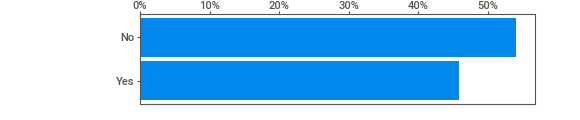
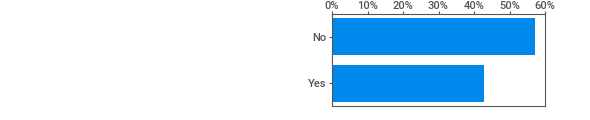
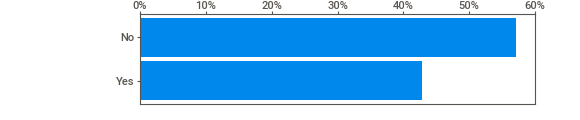
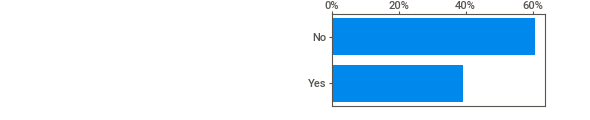
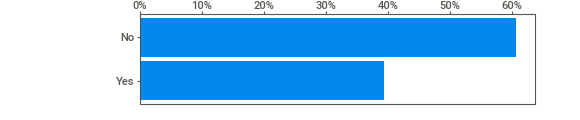
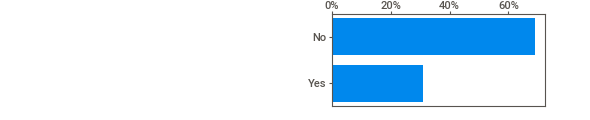
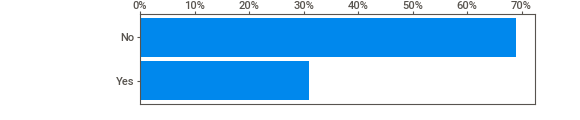
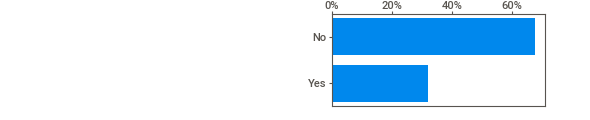
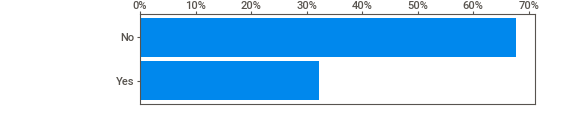
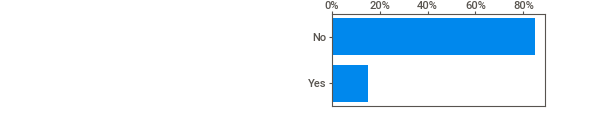
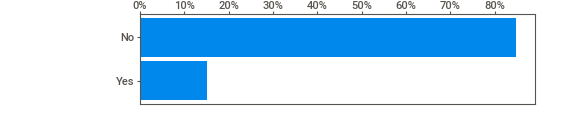
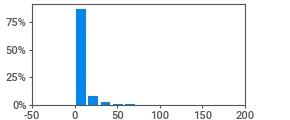
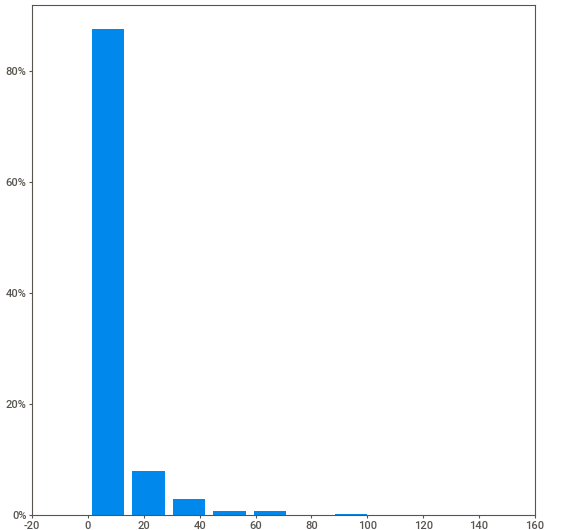
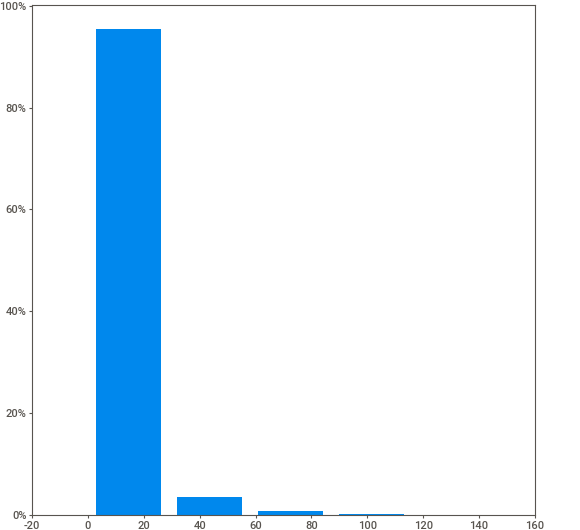
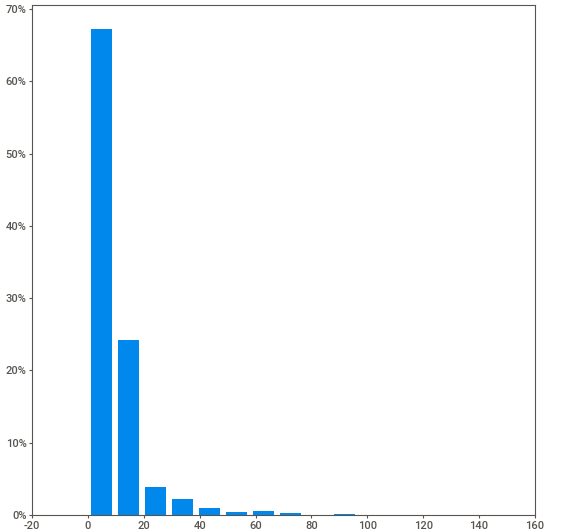
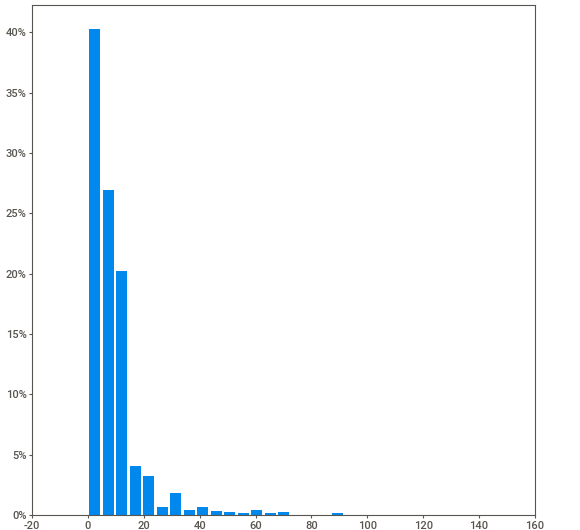
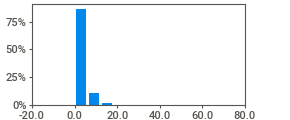
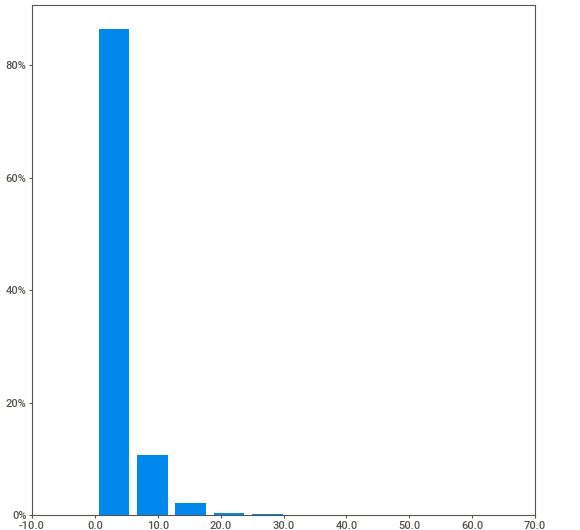
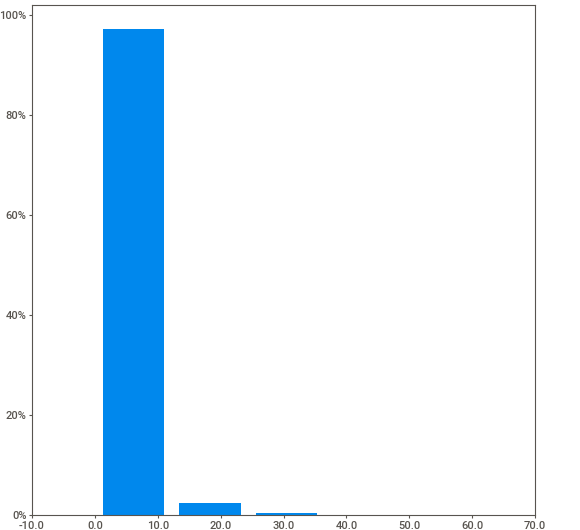
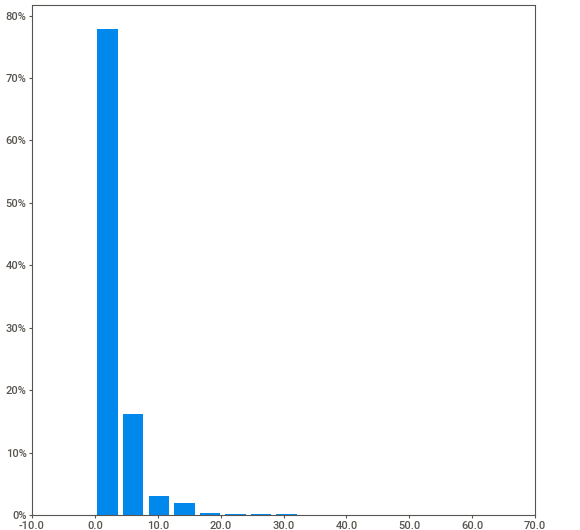
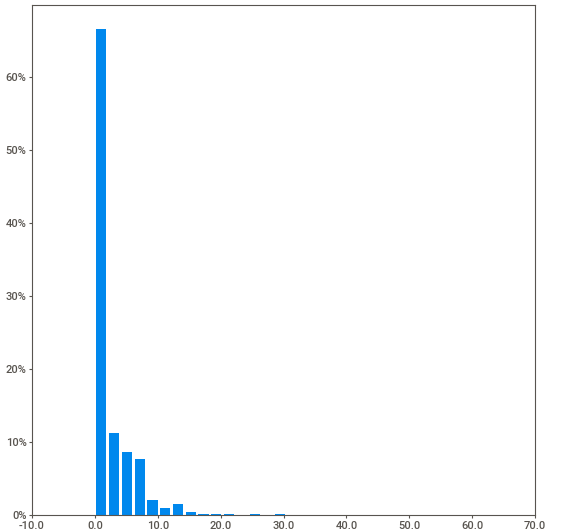
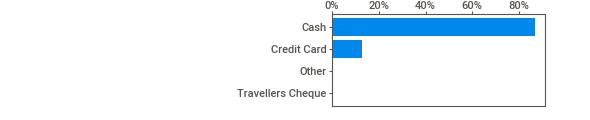
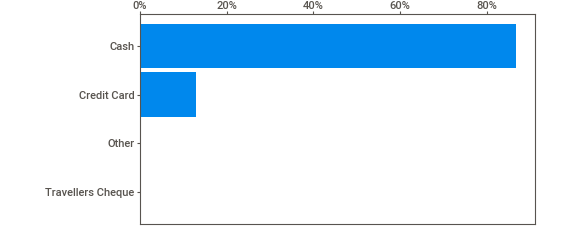
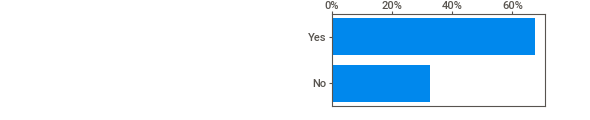
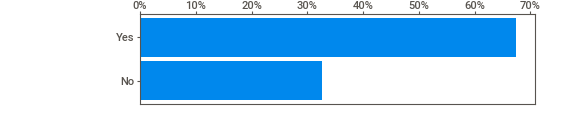
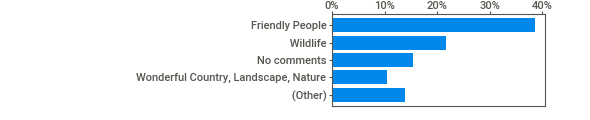
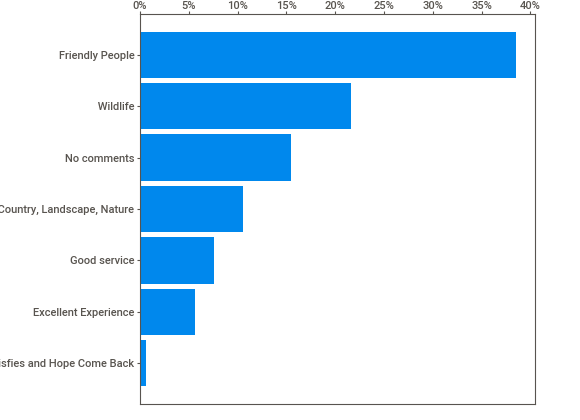
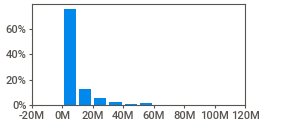
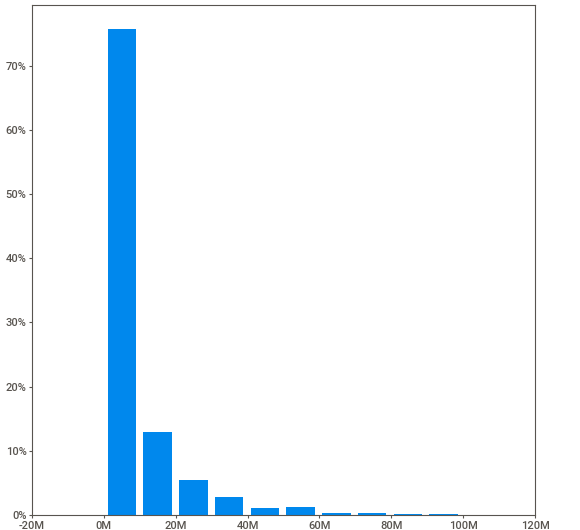
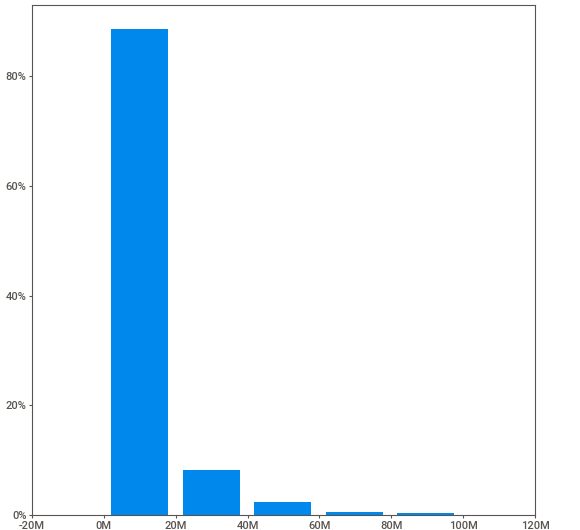
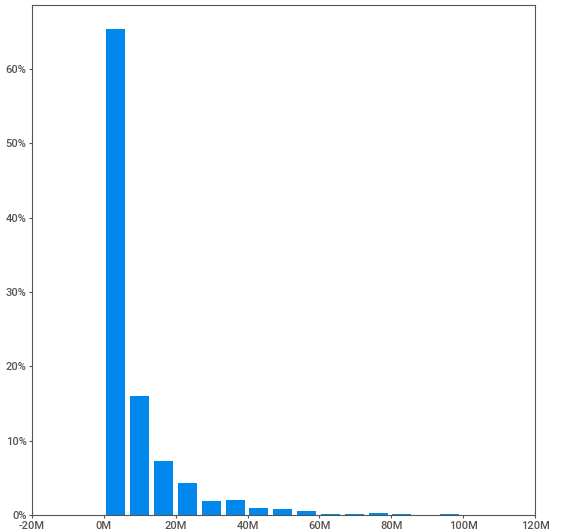
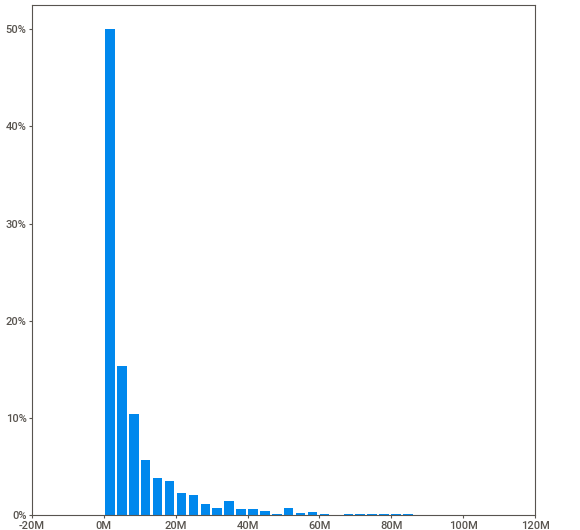
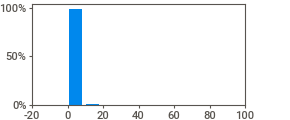
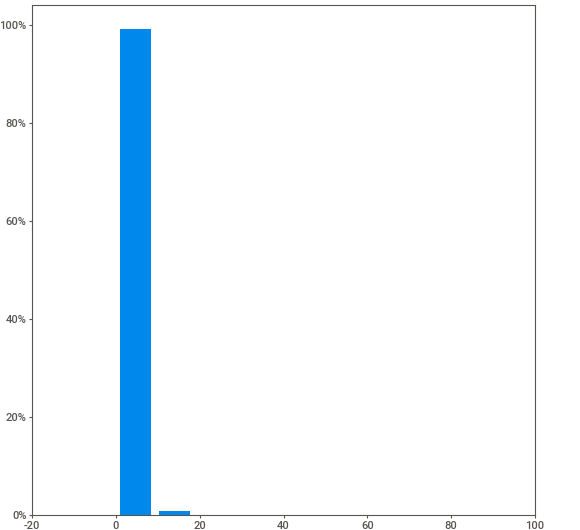
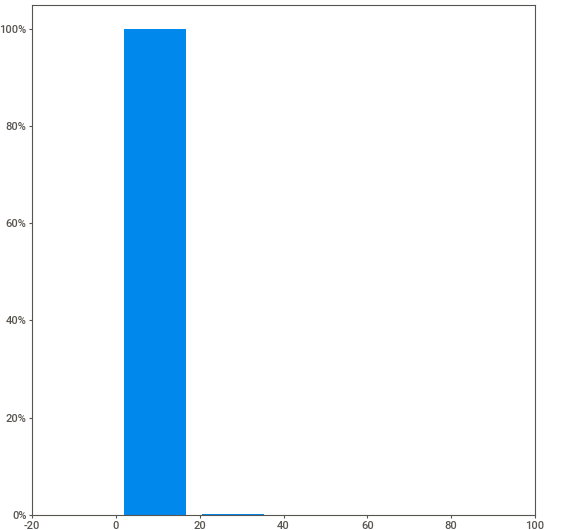
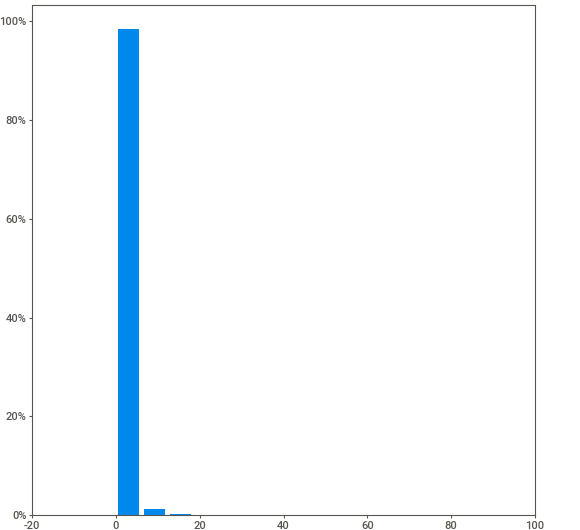
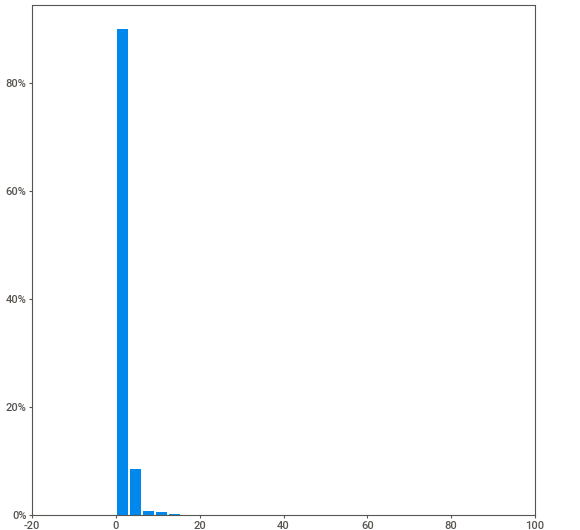
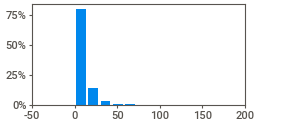
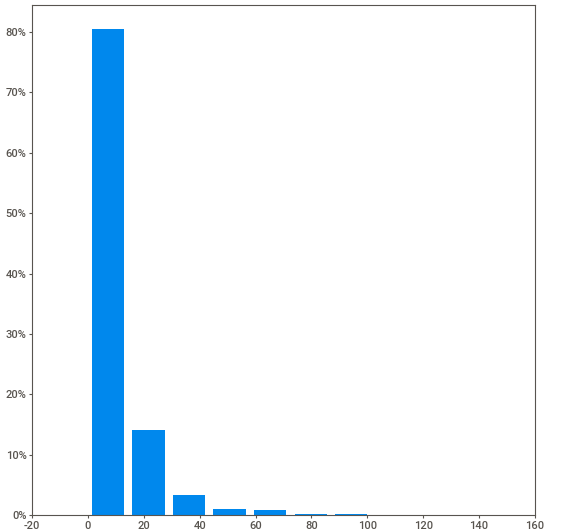
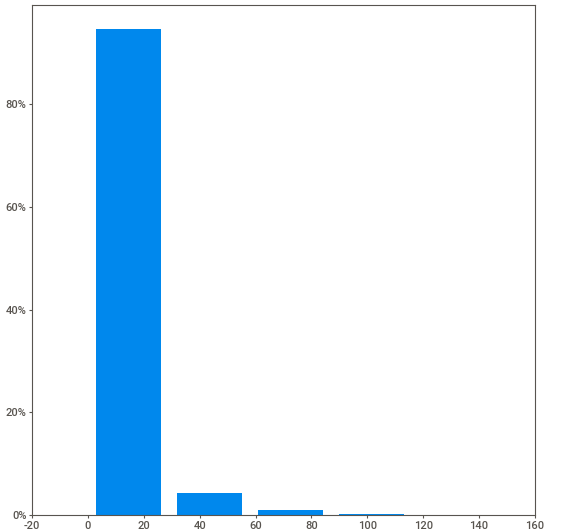
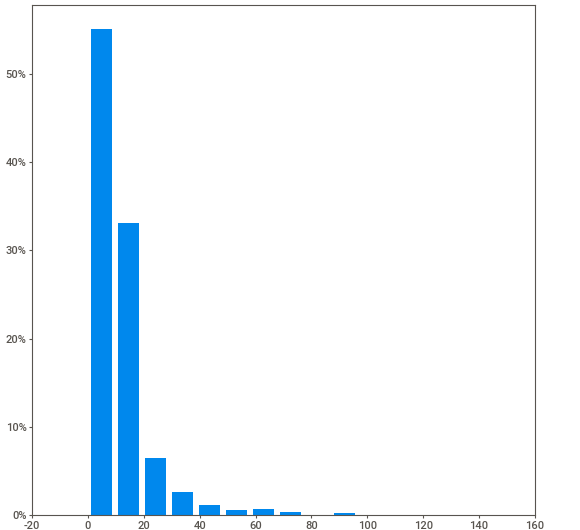
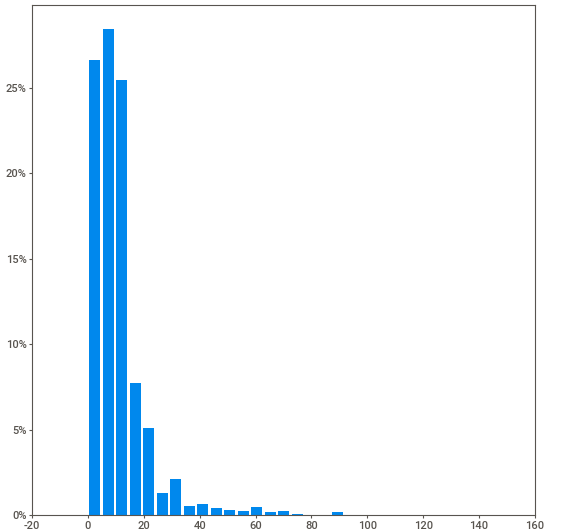
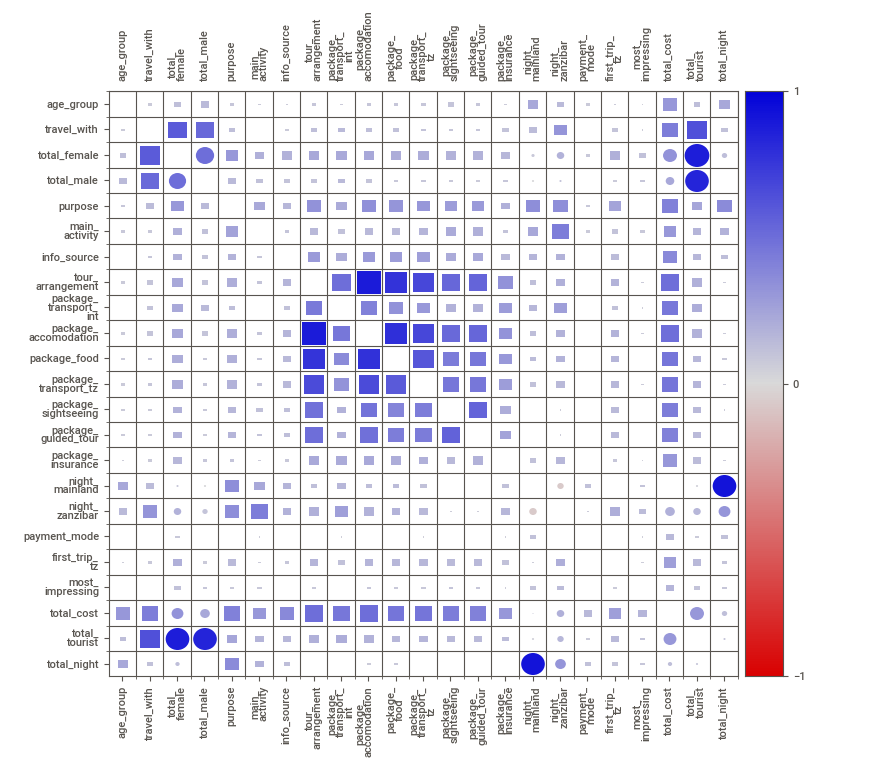
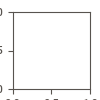

In [42]:

#showing the analsed data in my notebook
report.show_notebook()

array([[<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'age_group'}>,
        <Axes: title={'center': 'travel_with'}>,
        <Axes: title={'center': 'total_female'}>],
       [<Axes: title={'center': 'total_male'}>,
        <Axes: title={'center': 'tour_arrangement'}>,
        <Axes: title={'center': 'package_transport_int'}>,
        <Axes: title={'center': 'package_sightseeing'}>],
       [<Axes: title={'center': 'package_guided_tour'}>,
        <Axes: title={'center': 'package_insurance'}>,
        <Axes: title={'center': 'night_mainland'}>,
        <Axes: title={'center': 'night_zanzibar'}>],
       [<Axes: title={'center': 'total_cost'}>,
        <Axes: title={'center': 'total_tourist'}>,
        <Axes: title={'center': 'total_night'}>,
        <Axes: title={'center': 'package_transport_tzn'}>]], dtype=object)

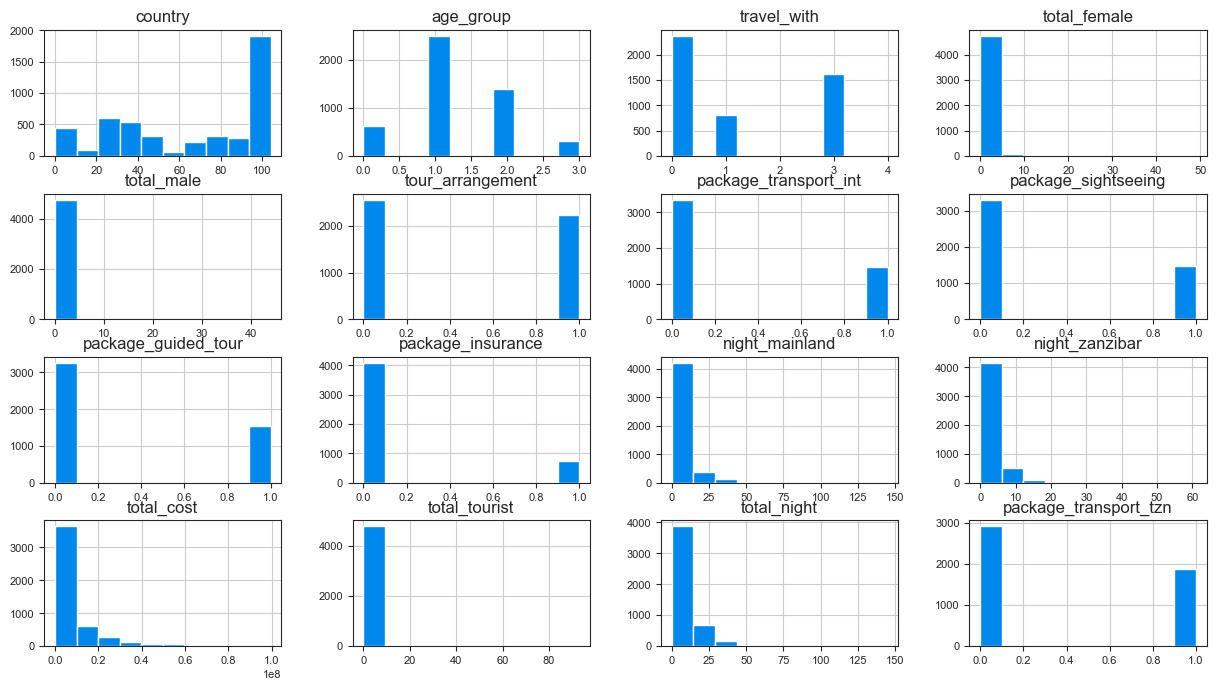

In [83]:
df_train.hist(figsize = (15,8)) 

<Axes: >

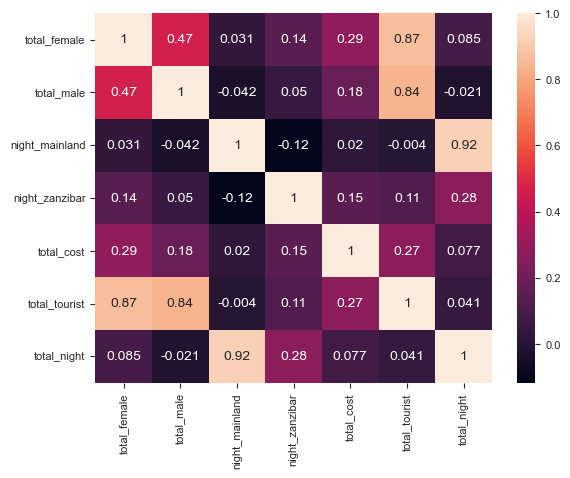

In [46]:
sns.heatmap(df_train.corr(), annot = True)

In [47]:
 

df_train.cov()

,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_tourist,total_night
total_female,1.658531e+00,6.845479e-01,4.189654e-01,7.541153e-01,4.503841e+06,2.315950e+00,1.173081e+00
total_male,6.845479e-01,1.295665e+00,-4.980106e-01,2.420768e-01,2.569791e+06,1.978351e+00,-2.559339e-01
night_mainland,4.189654e-01,-4.980106e-01,1.087353e+02,-5.208090e+00,2.609845e+06,-8.587069e-02,1.035273e+02
night_zanzibar,7.541153e-01,2.420768e-01,-5.208090e+00,1.786820e+01,7.500156e+06,1.001714e+00,1.266011e+01
total_cost,4.503841e+06,2.569791e+06,2.609845e+06,7.500156e+06,1.494483e+14,6.856614e+06,1.011000e+07
total_tourist,2.315950e+00,1.978351e+00,-8.587069e-02,1.001714e+00,6.856614e+06,4.294301e+00,9.158431e-01
total_night,1.173081e+00,-2.559339e-01,1.035273e+02,1.266011e+01,1.011000e+07,9.158431e-01,1.161874e+02


In [48]:
from sklearn.preprocessing import LabelEncoder
e= LabelEncoder()
s=df_train
s.shape

(4809, 25)

In [49]:
s['country']= e.fit_transform(s['country'])
s['age_group']= e.fit_transform(s['age_group'])
s['travel_with']= e.fit_transform(s['travel_with'])
s['tour_arrangement']= e.fit_transform(s['tour_arrangement'])
s['package_transport_int']= e.fit_transform(s['package_transport_int'])
s['package_transport_tzn']= e.fit_transform(s['package_transport_tz'])
s['package_sightseeing']= e.fit_transform(s['package_sightseeing'])
s['package_guided_tour']= e.fit_transform(s['package_guided_tour'])
s['package_insurance']= e.fit_transform(s['package_insurance'])

In [50]:
#use train dataset to train the model then use the test dataset to predict the total cost.
#droping the columns that are independent on the total cost. I.e columns which wouldnt affect cost.
target = df_train["total_cost"]
s = df_train.drop(['ID','purpose','main_activity','info_source','payment_mode','first_trip_tz','most_impressing','total_cost'],axis=1)
s.shape

(4809, 18)

In [51]:
s = pd.get_dummies(s)
s.shape

(4809, 21)

In [52]:
#After cleaning and analysing out data set we move to machine learning
#for model creation and predictions

import statsmodels.api as sm
import scipy.stats as stats

In [53]:

#standard scaler makes your mean zero (0)
#makes your standard deviation one(1)
#it slim the data frame into a particular model
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
s =scaler.fit_transform(s)
s.shape

(4809, 21)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(s, target, test_size =0.3, random_state = 40)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
print(model.intercept_)

8152511.572539438


In [61]:
print(model.coef_)

[  305467.03452723  1813890.84122435   687109.10093783 -1173501.59704407
 -1581958.44605889   583572.28663675  2436859.59723169  1263781.99300949
    65944.23691706   -76801.4866099    315887.66917618   631273.21799099
  4394771.07190873   553148.38748805   208401.38557318  -720691.92068595
   720691.92068598    79178.19189938   -79178.19189938  -208401.38557317
   208401.38557316]


In [62]:
print(model.score(x_train,y_train))

0.3269330492384781


In [63]:
predictions = model.predict(x_test)

In [64]:
predictions

array([ 8831690.85692992, 13564659.82159226,  -446447.85634822, ...,
        8606626.03676801, 14006497.75358551, 12314828.08608224])

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(predictions,y_test)
mae = mean_absolute_error(predictions,y_test)
mse = mean_squared_error(predictions,y_test)
rmse = np.sqrt(mse)

In [66]:
print('Score = ',score)
print('Mean Absolut Error = ',mae)
print('Mean Square Error = ',mse)
print('Root Mean Squared Error = ',rmse)

Score =  -0.9761165089550192
Mean Absolut Error =  5716040.944127532
Mean Square Error =  95253289324209.12
Root Mean Squared Error =  9759779.163700843


In [67]:
# using the test dataset.

In [68]:
df_test
df_test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_tourist,total_night
0,tour_1,AUSTRALIA,45-64,spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife,2.0,13
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0,13
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,7,14,Cash,No,No comments,3.0,21
3,tour_1006,CANADA,1-24,spouse,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,0,4,Cash,Yes,Friendly People,2.0,4
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,No,No,No,10,0,Cash,Yes,Friendly People,4.0,10


In [69]:

e= LabelEncoder()
z= df_test
z.shape

(1601, 24)

In [70]:
# label encoding to get equal column for prediction using maching learning
z['country']= e.fit_transform(z['country'])
z['age_group']= e.fit_transform(z['age_group'])
z['travel_with']= e.fit_transform(z['travel_with'])
z['tour_arrangement']= e.fit_transform(z['tour_arrangement'])
z['package_transport_int']= e.fit_transform(z['package_transport_int'])
z['package_transport_tzn']= e.fit_transform(z['package_transport_tz'])
z['package_sightseeing']= e.fit_transform(z['package_sightseeing'])
z['package_guided_tour']= e.fit_transform(z['package_guided_tour'])
z['package_insurance']= e.fit_transform(z['package_insurance'])
z.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_tourist,total_night,package_transport_tzn
0,tour_1,1,2,3,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,1,10,3,Cash,Yes,Wildlife,2.0,13,1
1,tour_100,70,1,1,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,1,...,0,0,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0,13,0
2,tour_1001,26,1,1,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",0,...,0,0,7,14,Cash,No,No comments,3.0,21,0
3,tour_1006,10,0,3,2.0,0.0,Leisure and Holidays,Cultural tourism,others,0,...,0,0,0,4,Cash,Yes,Friendly People,2.0,4,0
4,tour_1009,81,2,1,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",1,...,0,0,10,0,Cash,Yes,Friendly People,4.0,10,1


In [71]:
y = df_test.drop(['ID','purpose','main_activity','info_source','payment_mode','first_trip_tz','most_impressing',],axis=1)
y.shape

(1601, 18)

In [72]:
z = pd.get_dummies(y)
z.shape

(1601, 21)

In [73]:
scaler = StandardScaler()
z =scaler.fit_transform(z)
z.shape

(1601, 21)

In [74]:
predictions = model.predict(z)
predictions

array([18662943.85483099, 13918273.67578155,  5208196.73360832, ...,
         238143.98409186, -1776094.02449157,  4228692.03415084])

In [79]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 1.6 MB/s eta 0:00:00


In [80]:
from xgboost import XGBRegressor
XGB =XGBRegressor()
XGB.fit(s,target)
predictions =XGB.predict(z)
predictions

array([13692537. ,  4416418. , 11249304. , ...,  4570890.5,  -402445.6,
        4823483. ], dtype=float32)

In [81]:
z = df_test.assign(predicted_prices = predictions)
z.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_tourist,total_night,package_transport_tzn,predicted_prices
0,tour_1,1,2,3,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,10,3,Cash,Yes,Wildlife,2.0,13,1,1.369254e+07
1,tour_100,70,1,1,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,1,...,0,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0,13,0,4.416418e+06
2,tour_1001,26,1,1,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",0,...,0,7,14,Cash,No,No comments,3.0,21,0,1.124930e+07
3,tour_1006,10,0,3,2.0,0.0,Leisure and Holidays,Cultural tourism,others,0,...,0,0,4,Cash,Yes,Friendly People,2.0,4,0,-2.117166e+05
4,tour_1009,81,2,1,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",1,...,0,10,0,Cash,Yes,Friendly People,4.0,10,1,2.972100e+07
